PROJECT Pima Indians Diabetes Database


I'll solve this Pima Indians Diabetes Database problem with multiple machine learning techniques. I'll use Python with scikit-learn for implementation.

Key Implementation Details:
•	Multiple ML algorithms: Logistic Regression, Decision Tree, Random Forest, SVM
•	Preprocessing: Feature scaling
•	Evaluation metrics: Accuracy, classification report
•	Visualization of model performance
•	Feature importance analysis
Recommended Next Steps:
1.	Hyperparameter tuning
2.	Try advanced techniques like gradient boosting
3.	Handle class imbalance if present
4.	Diabetes Prediction: Identifying Key Factors
5.	Understanding the Dataset
6.	Feature Exploration: Numeric Attributes
7.	Correlations and Relationships
8.	Preparing the Data for Analysis
9.	Applying Machine Learning Models
10.	Evaluating Model Performance
11.	Insights and Next Steps


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset (assuming CSV format)
data = pd.read_csv('diabetes.csv')


In [3]:
# View first few rows
print(data.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# View last  few rows
print(data.tail(5))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


In [5]:
# View summary statistics
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
# View data types
print(data.dtypes)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [7]:
#deleting rows - missed vales
data.dropna(inplace=True)
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

Data Visualization

<Axes: xlabel='Pregnancies', ylabel='count'>

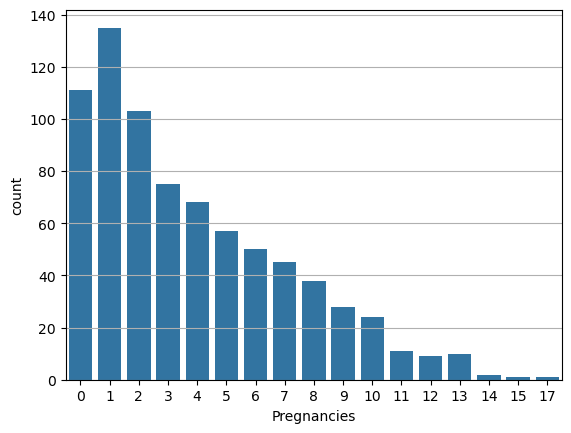

In [9]:
# Histogram
data['Pregnancies'].hist(bins=50)

# Bar plot
sns.countplot(x='Pregnancies', data=data)


<Axes: xlabel='Pregnancies', ylabel='count'>

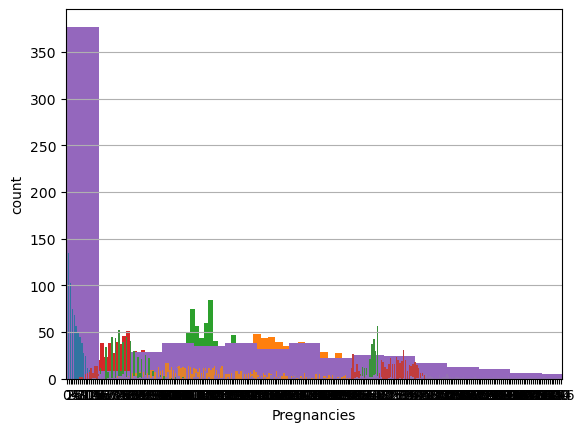

In [10]:
# Bar plot

data['Pregnancies'].hist(bins=50)
data['Glucose'].hist(bins=50)
data['BloodPressure'].hist(bins=50)
data['SkinThickness'].hist(bins=50)
data['Insulin'].hist(bins=50)

sns.countplot(x='Pregnancies', data=data)
sns.countplot(x='Glucose', data=data)
sns.countplot(x='BloodPressure', data=data)
sns.countplot(x='SkinThickness', data=data)
sns.countplot(x='Insulin', data=data)



<Axes: xlabel='Pregnancies', ylabel='Insulin'>

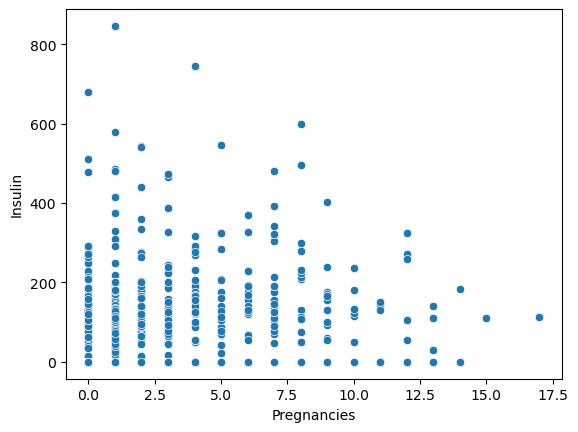

In [11]:
# Scatter plot
sns.scatterplot(x='Pregnancies', y='Insulin', data=data)


<Axes: xlabel='SkinThickness'>

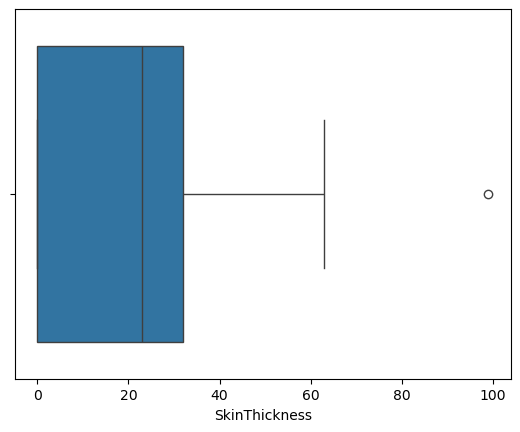

In [12]:
# Box plot
sns.boxplot(x='SkinThickness', data=data)

<Axes: >

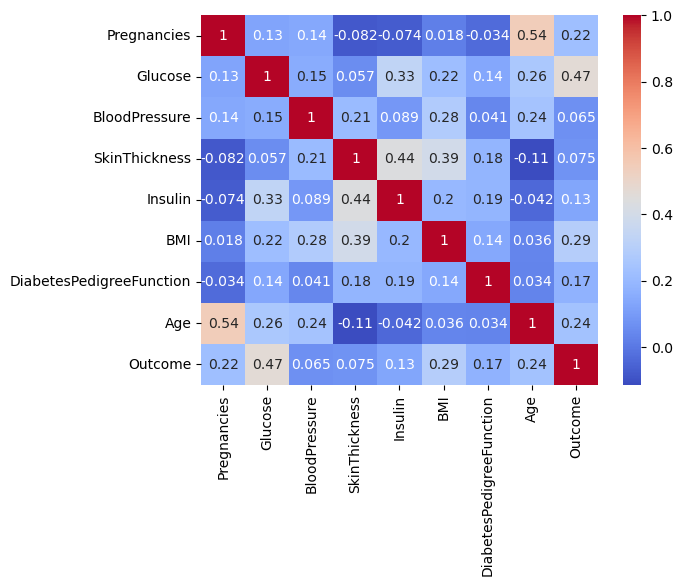

In [13]:
# Heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [14]:
# Handling missing values
data.fillna(data.mean(), inplace=True)

In [15]:
# Encoding categorical variables
data['Pregnancies'] = pd.Categorical(data['Glucose']).codes

In [16]:
# Scaling numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Pregnancies', 'Glucose']] = scaler.fit_transform(data[['BloodPressure', 'Insulin']])

Data Transformation

In [17]:
# Log transformation
data['Pregnancies'] = np.log(data['Glucose'])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
#functions for visualizing datasets
import klib
import pandas as pd
klib.describe

<module 'klib.describe' from 'C:\\Users\\LENOVO\\AppData\\Roaming\\Python\\Python312\\site-packages\\klib\\describe.py'>

In [19]:
klib.cat_plot(data)

No columns with categorical data were detected.


In [20]:
klib.corr_mat(data)

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\klib\describe.py:275: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  return corr.style.applymap(color_negative_red).format("{:.2f}", na_rep="-")


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00,0.80,0.19,0.20,0.80,0.24,0.11,0.22,0.26
Glucose,0.80,1.00,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BloodPressure,0.19,0.09,1.00,0.21,0.09,0.28,0.04,0.24,0.07
SkinThickness,0.20,0.44,0.21,1.00,0.44,0.39,0.18,-0.11,0.07
Insulin,0.80,1.00,0.09,0.44,1.00,0.20,0.19,-0.04,0.13
BMI,0.24,0.20,0.28,0.39,0.20,1.00,0.14,0.04,0.29
DiabetesPedigreeFunction,0.11,0.19,0.04,0.18,0.19,0.14,1.00,0.03,0.17
Age,0.22,-0.04,0.24,-0.11,-0.04,0.04,0.03,1.00,0.24
Outcome,0.26,0.13,0.07,0.07,0.13,0.29,0.17,0.24,1.00


<Axes: title={'center': 'Feature-correlation (pearson)'}>

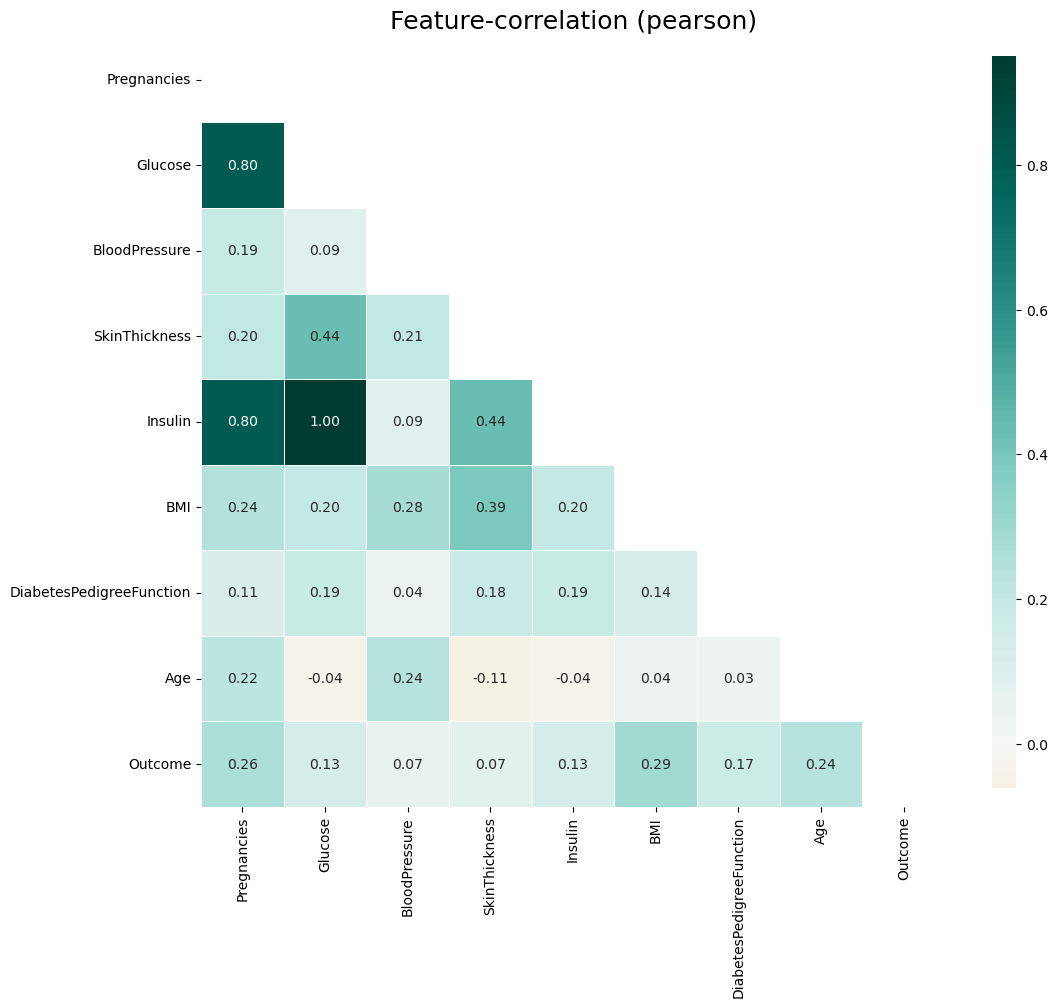

In [21]:
klib.corr_plot(data)

<Axes: xlabel='Age', ylabel='Density'>

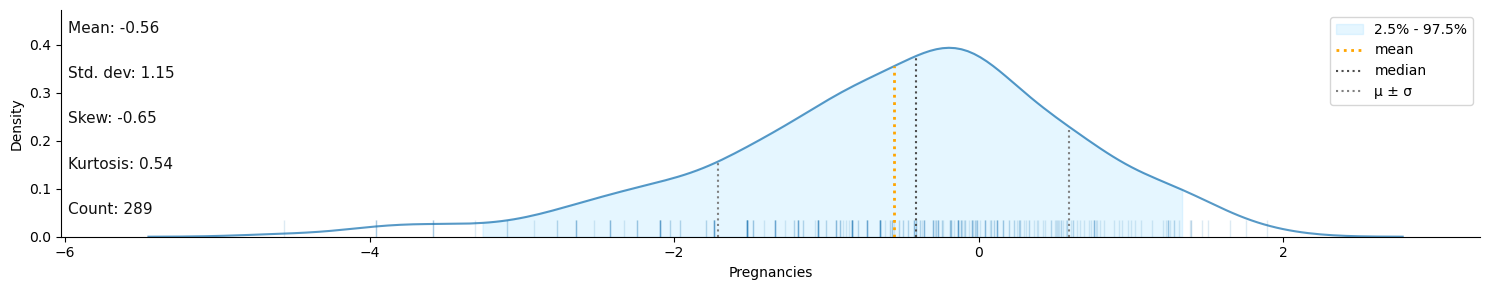

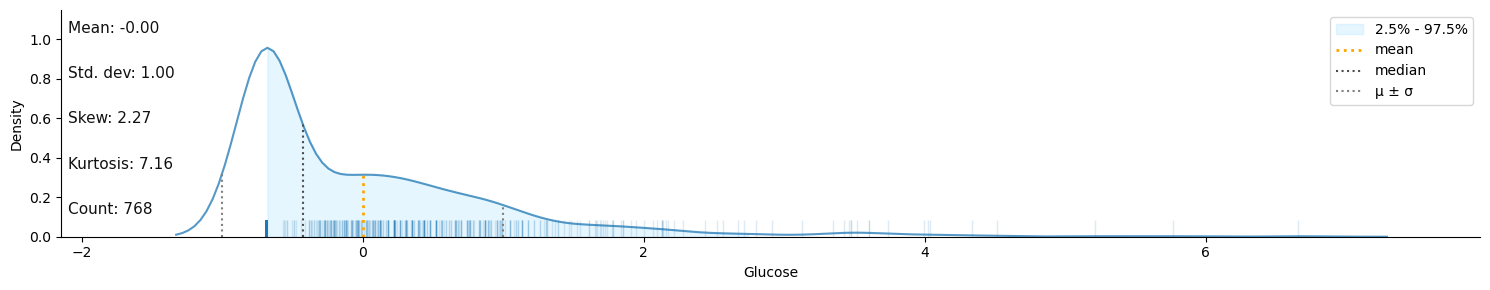

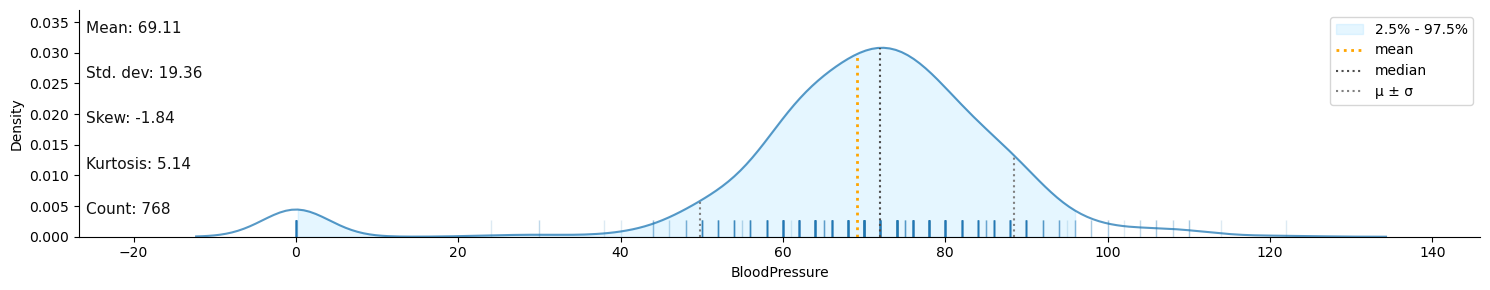

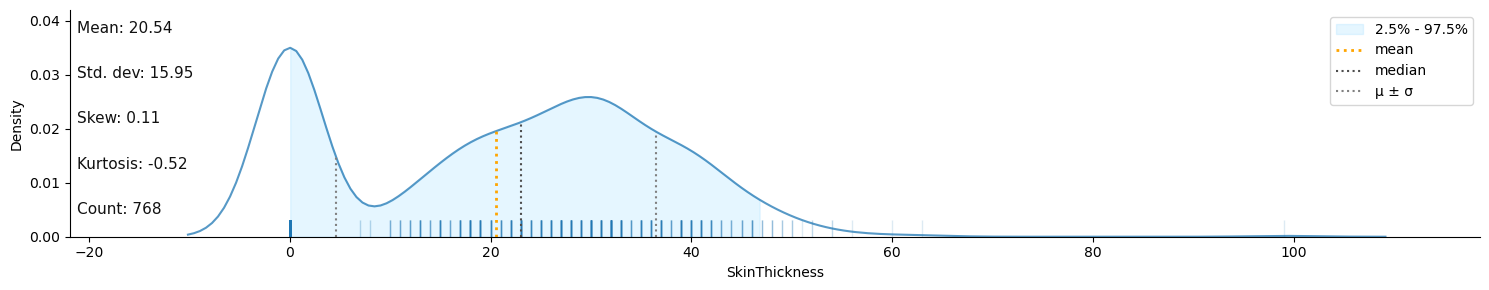

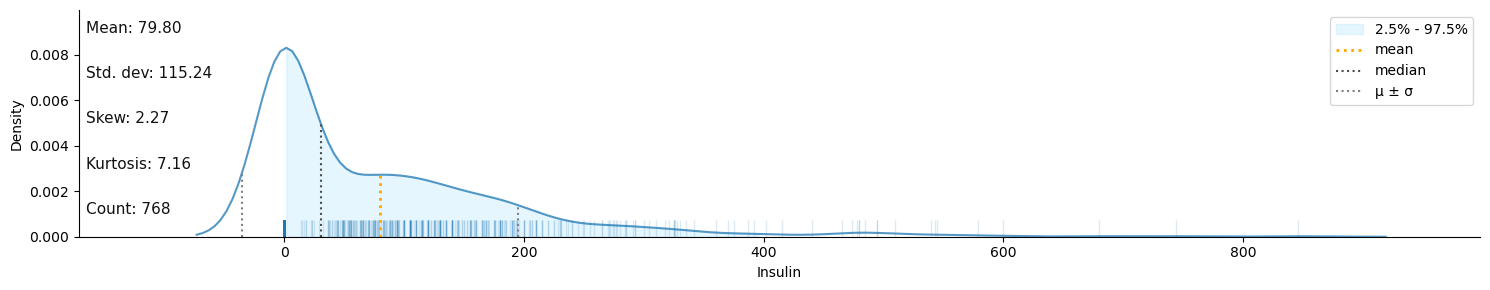

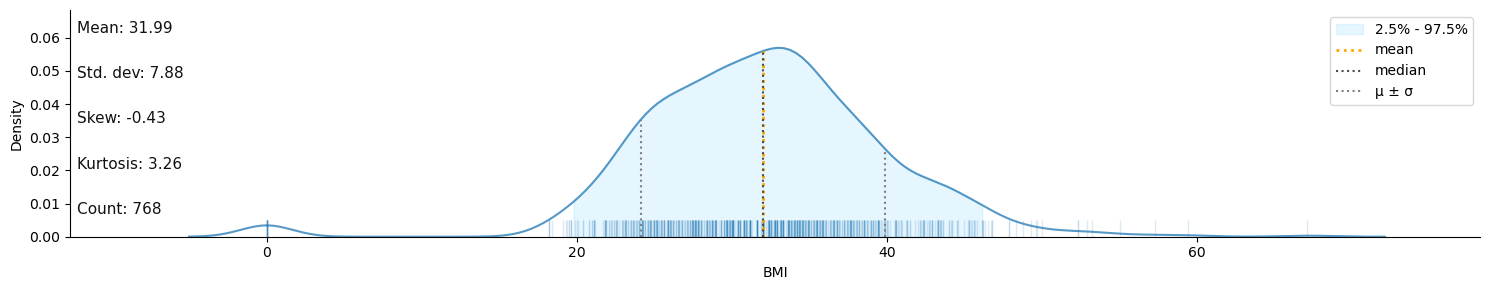

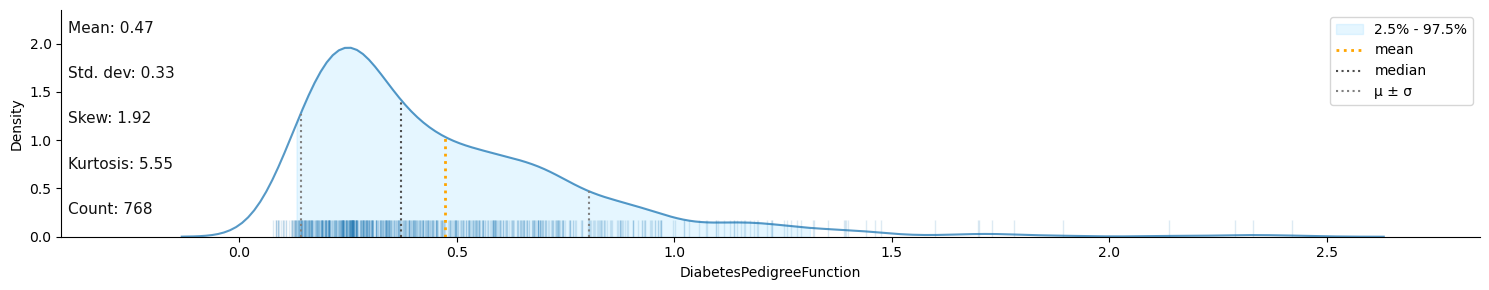

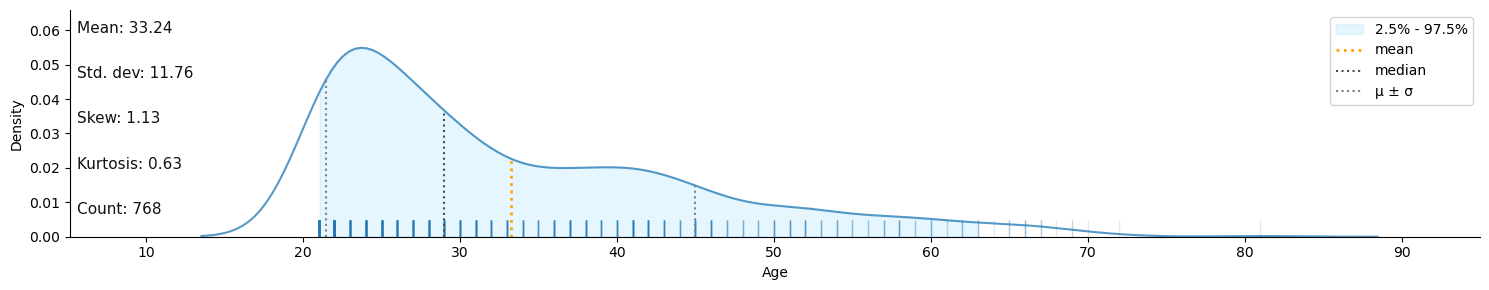

In [22]:
klib.dist_plot(data)

GridSpec(6, 6)

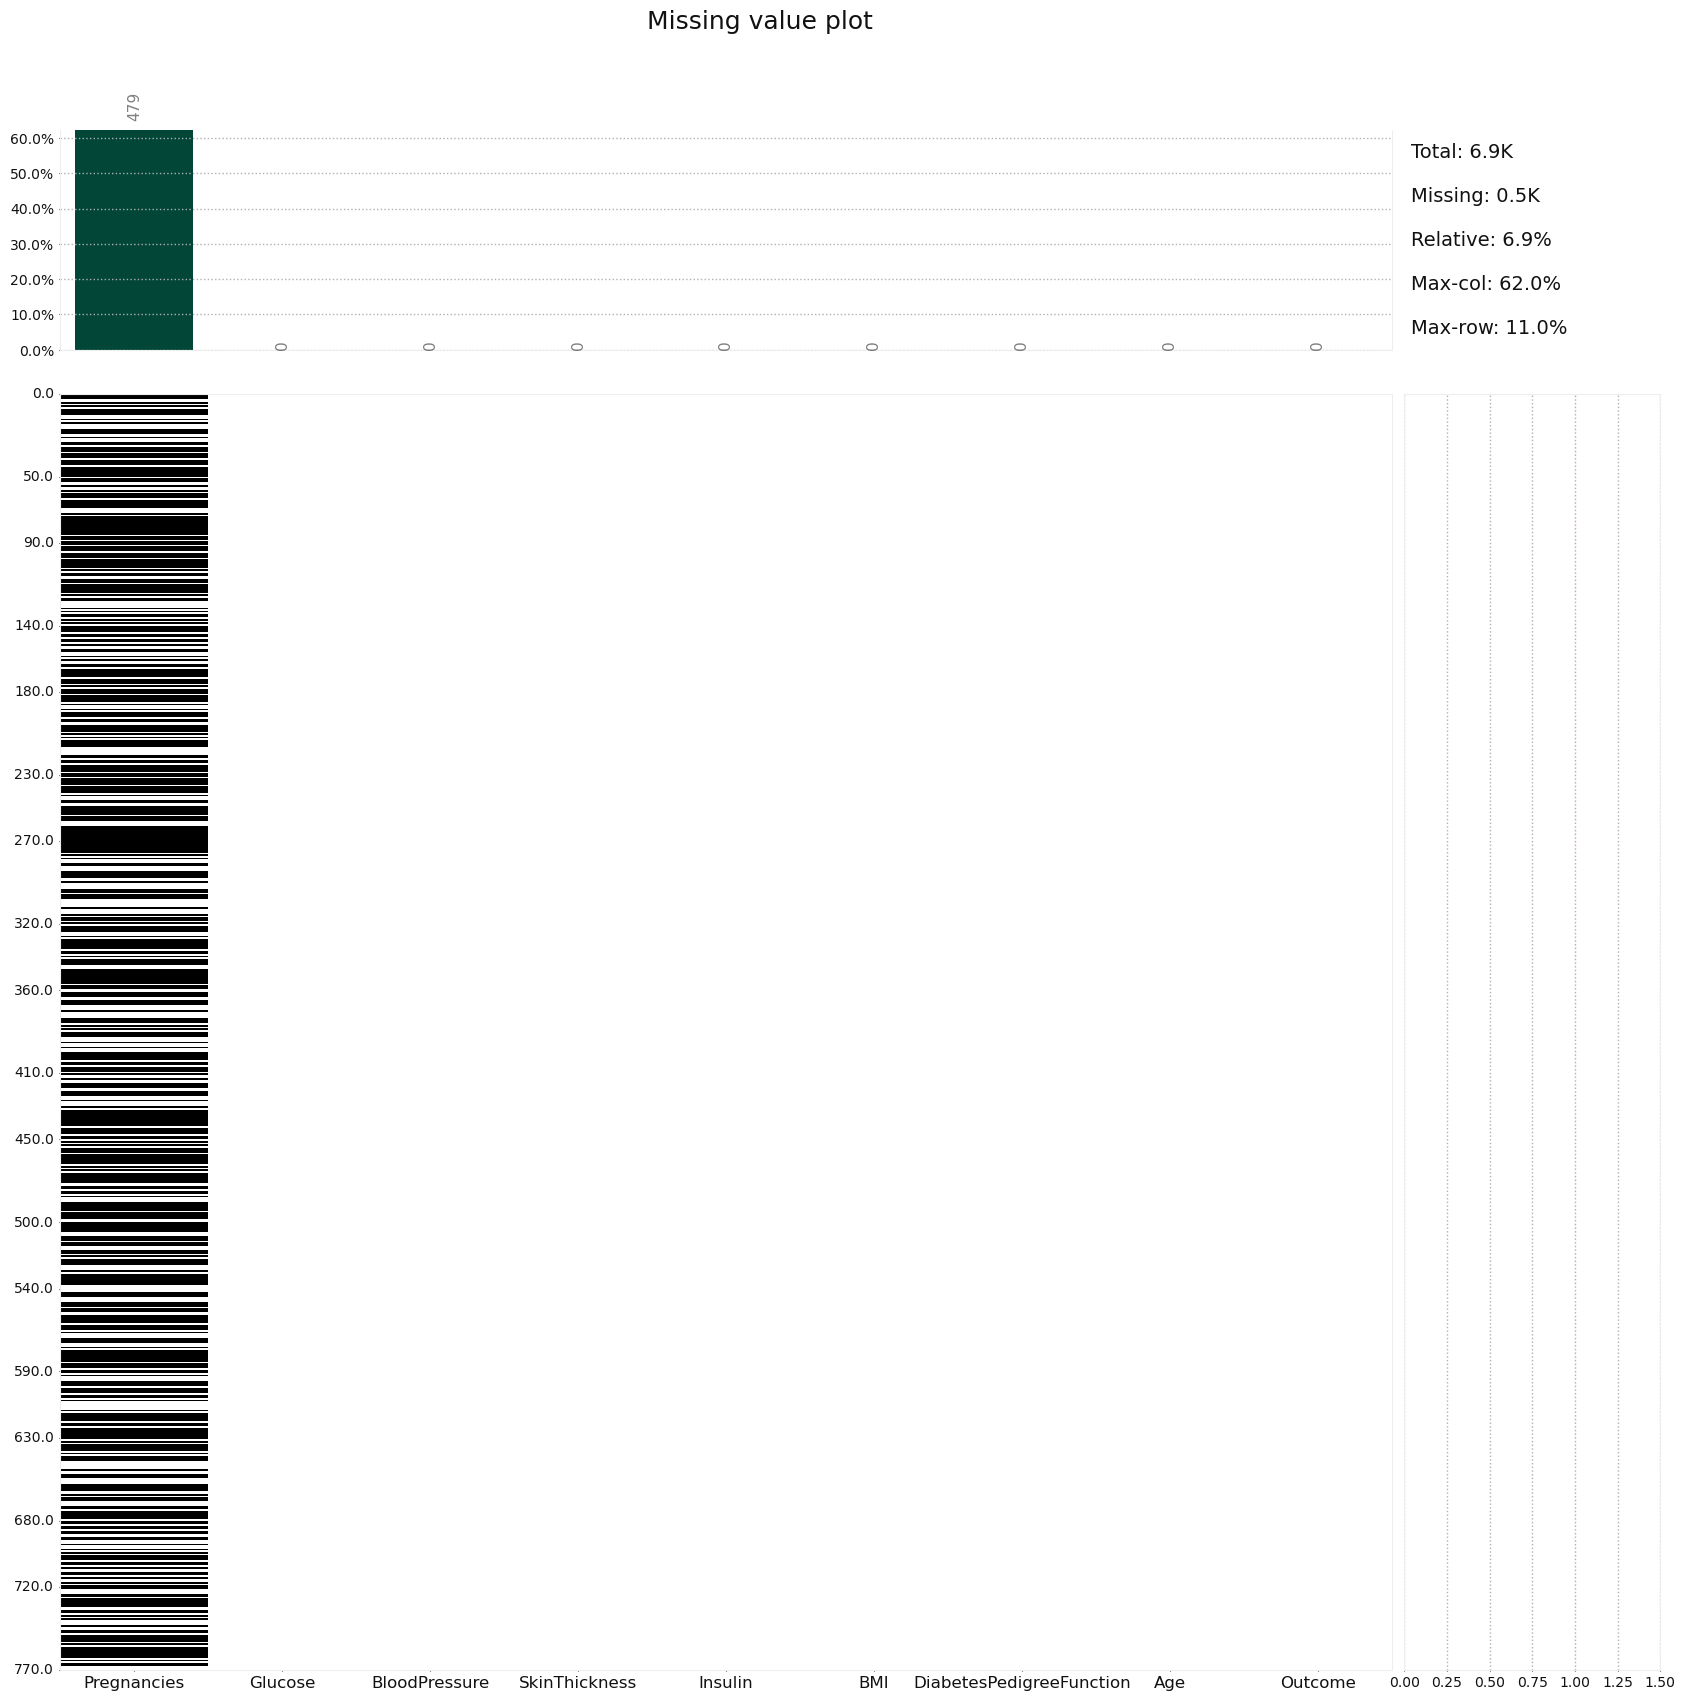

In [23]:
klib.missingval_plot(data)

In [24]:
# klib.clean - functions for cleaning datasets

# performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
klib.data_cleaning(data)

Shape of cleaned data: (768, 9) - Remaining NAs: 479


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.03 MB (-60.0%)



,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,NaN,-0.692891,72,35,0,33.599998,0.627,50,1
1,NaN,-0.692891,66,29,0,26.600000,0.351,31,0
2,NaN,-0.692891,64,0,0,23.299999,0.672,32,1
3,-2.093122,0.123302,66,23,94,28.100000,0.167,21,0
4,-0.266787,0.765836,40,35,168,43.099998,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,-0.139227,0.870031,76,48,180,32.900002,0.171,63,0
764,NaN,-0.692891,70,27,0,36.799999,0.340,27,0
765,-1.274418,0.279594,72,23,112,26.200001,0.245,30,0
766,NaN,-0.692891,60,0,0,30.100000,0.349,47,1


In [25]:
klib.clean_column_names(data)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,NaN,-0.692891,72,35,0,33.6,0.627,50,1
1,NaN,-0.692891,66,29,0,26.6,0.351,31,0
2,NaN,-0.692891,64,0,0,23.3,0.672,32,1
3,-2.093122,0.123302,66,23,94,28.1,0.167,21,0
4,-0.266787,0.765836,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,-0.139227,0.870031,76,48,180,32.9,0.171,63,0
764,NaN,-0.692891,70,27,0,36.8,0.340,27,0
765,-1.274418,0.279594,72,23,112,26.2,0.245,30,0
766,NaN,-0.692891,60,0,0,30.1,0.349,47,1


In [26]:
klib.convert_datatypes(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,-0.692891,72,35,0,33.599998,0.627,50,1
1,NaN,-0.692891,66,29,0,26.600000,0.351,31,0
2,NaN,-0.692891,64,0,0,23.299999,0.672,32,1
3,-2.093122,0.123302,66,23,94,28.100000,0.167,21,0
4,-0.266787,0.765836,40,35,168,43.099998,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,-0.139227,0.870031,76,48,180,32.900002,0.171,63,0
764,NaN,-0.692891,70,27,0,36.799999,0.340,27,0
765,-1.274418,0.279594,72,23,112,26.200001,0.245,30,0
766,NaN,-0.692891,60,0,0,30.100000,0.349,47,1


In [27]:
klib.drop_missing(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,-0.692891,72,35,0,33.6,0.627,50,1
1,NaN,-0.692891,66,29,0,26.6,0.351,31,0
2,NaN,-0.692891,64,0,0,23.3,0.672,32,1
3,-2.093122,0.123302,66,23,94,28.1,0.167,21,0
4,-0.266787,0.765836,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,-0.139227,0.870031,76,48,180,32.9,0.171,63,0
764,NaN,-0.692891,70,27,0,36.8,0.340,27,0
765,-1.274418,0.279594,72,23,112,26.2,0.245,30,0
766,NaN,-0.692891,60,0,0,30.1,0.349,47,1


In [28]:
klib.mv_col_handling(data)

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\klib\clean.py:443: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_local[cols_mv] = data_local[cols_mv].applymap(lambda x: x if pd.isna(x) else 1).fillna(0)
C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\klib\clean.py:449: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(corrmat[col]).nlargest(2)[1] > corr_thresh_features:


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.692891,72,35,0,33.6,0.627,50,1
1,-0.692891,66,29,0,26.6,0.351,31,0
2,-0.692891,64,0,0,23.3,0.672,32,1
3,0.123302,66,23,94,28.1,0.167,21,0
4,0.765836,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,0.870031,76,48,180,32.9,0.171,63,0
764,-0.692891,70,27,0,36.8,0.340,27,0
765,0.279594,72,23,112,26.2,0.245,30,0
766,-0.692891,60,0,0,30.1,0.349,47,1


In [29]:
klib.pool_duplicate_subsets(data)

,BMI,DiabetesPedigreeFunction,Age,pooled_vars
0,33.6,0.627,50,0
1,26.6,0.351,31,1
2,23.3,0.672,32,2
3,28.1,0.167,21,3
4,43.1,2.288,33,4
...,...,...,...,...
763,32.9,0.171,63,763
764,36.8,0.340,27,47
765,26.2,0.245,30,765
766,30.1,0.349,47,766


GridSpec(6, 6)

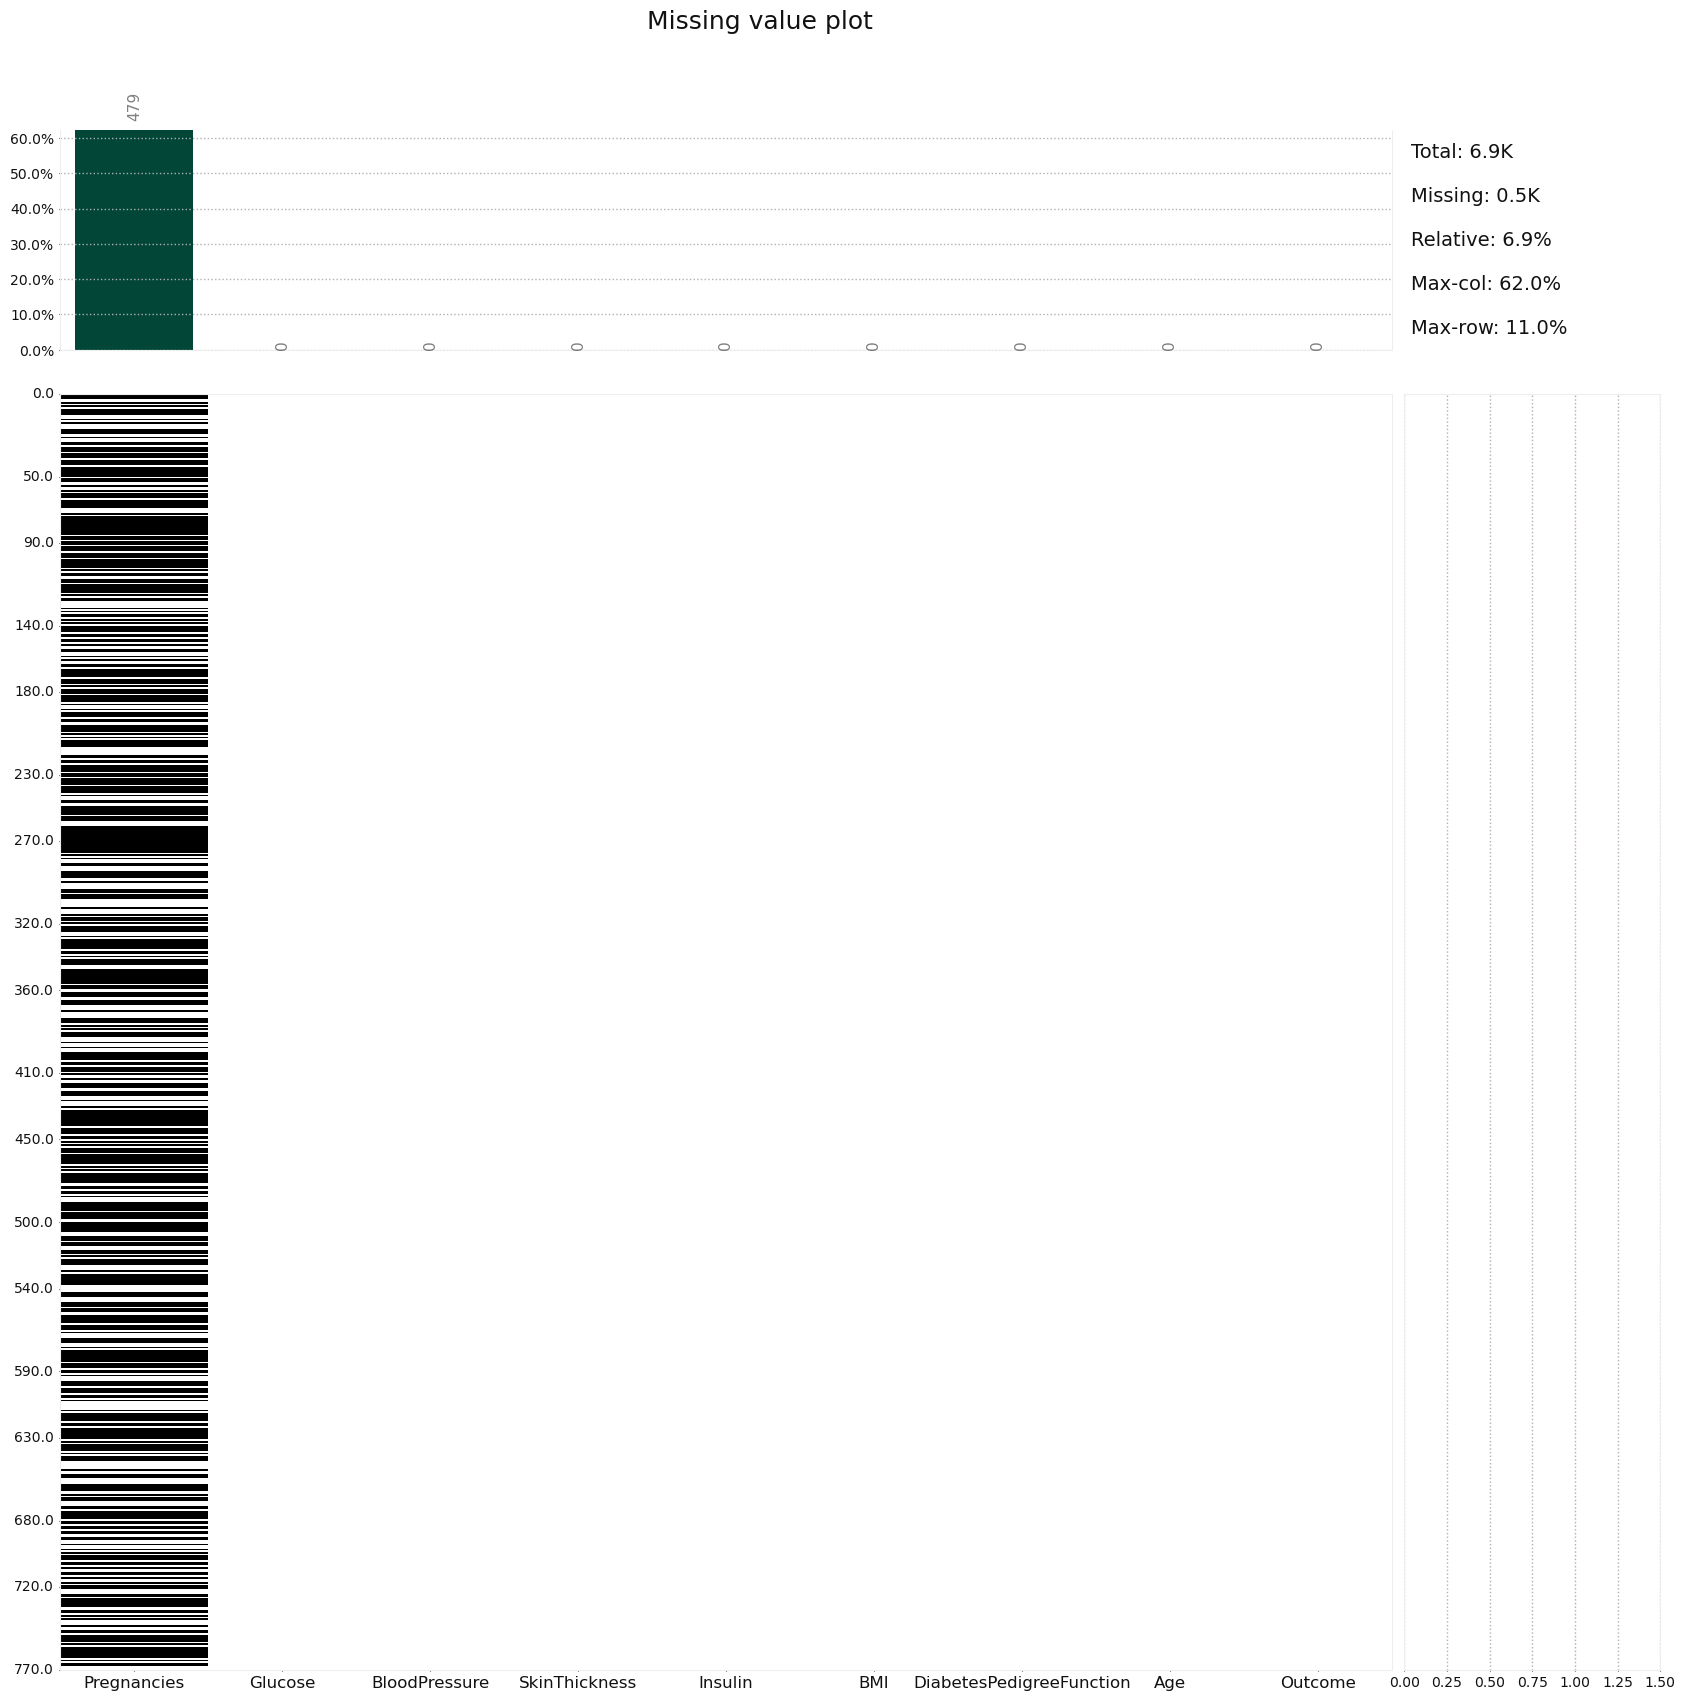

In [30]:
klib.missingval_plot(data)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

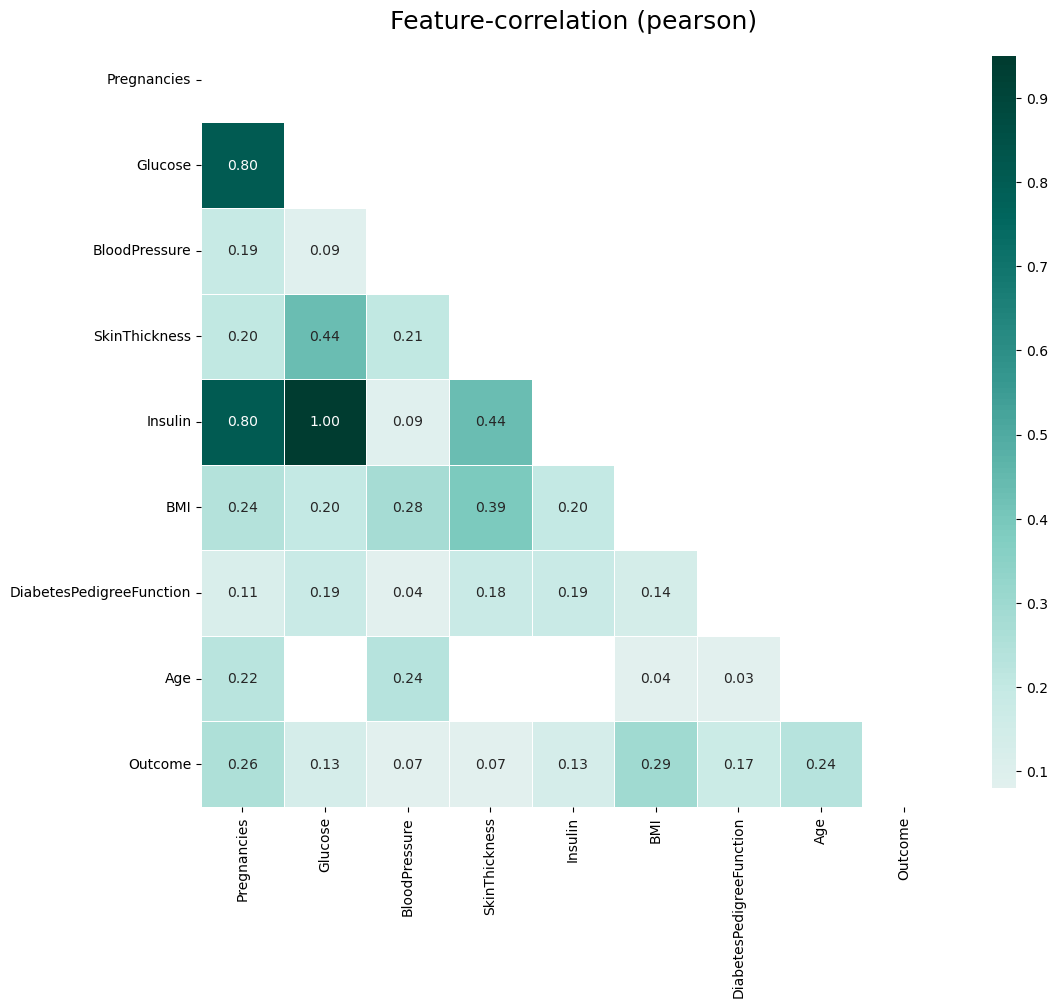

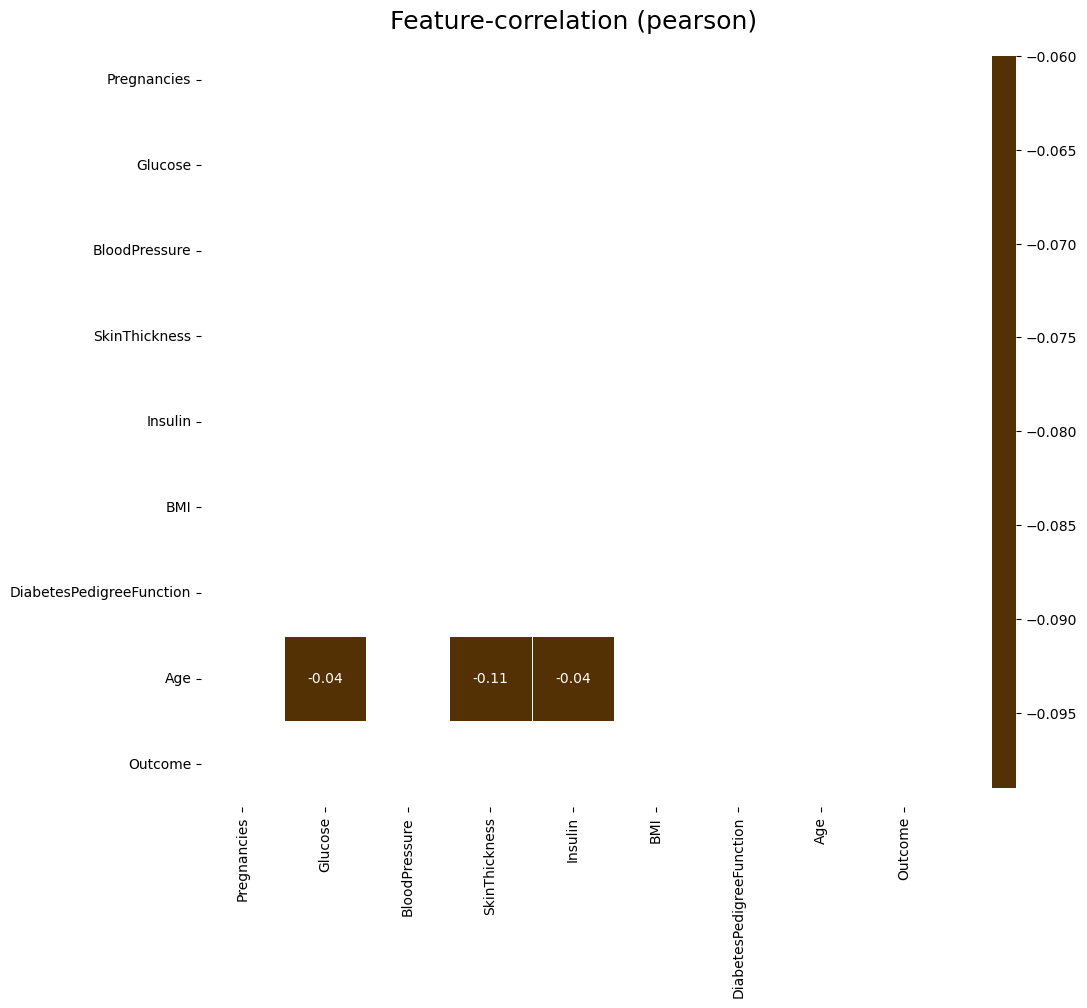

In [31]:
# displaying only positive correlations, other settings include threshold, cmap...
# displaying only negative correlations
klib.corr_plot(data, split='pos') 
klib.corr_plot(data, split='neg') 

<Axes: title={'center': 'Feature-correlation (pearson)'}>

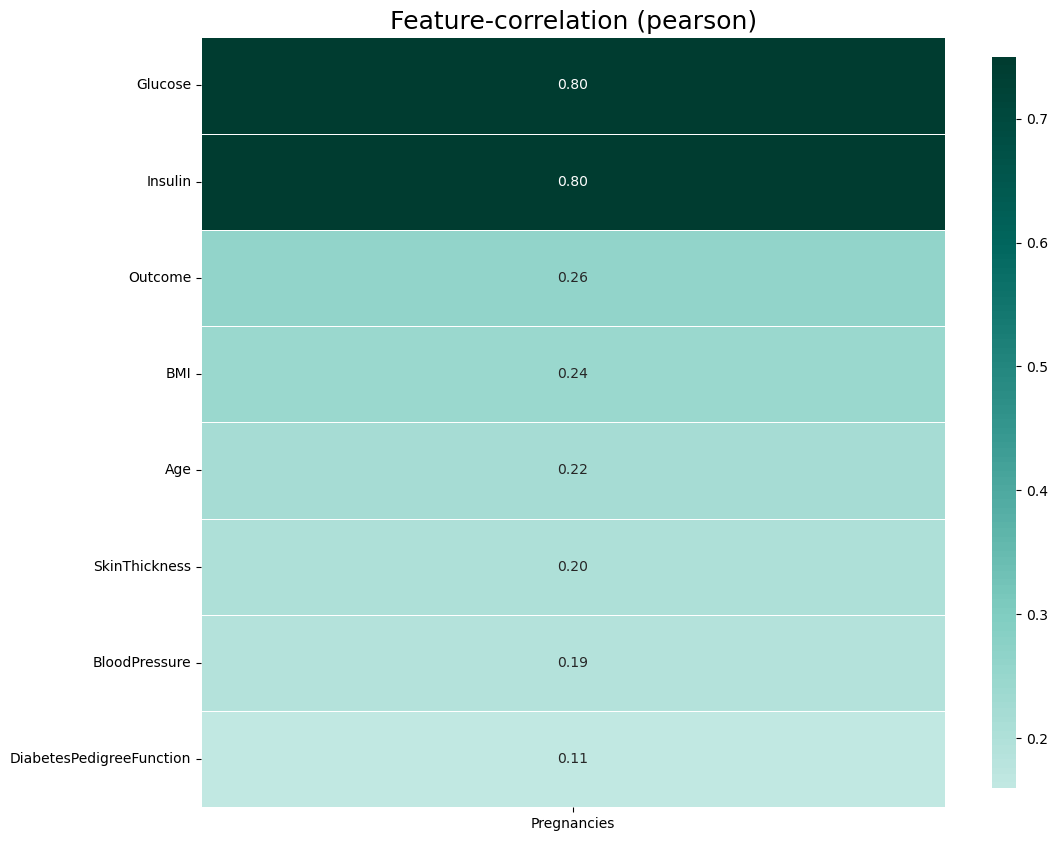

In [32]:
# default representation of correlations with the feature column
klib.corr_plot(data, target='Pregnancies')

In [33]:
# representation of the 4 most & least common values in each categorical column
klib.cat_plot(data, top=4, bottom=4)

No columns with categorical data were detected.


MODEL BUILDING
Decision tree is a graphical representation of a decision-making process. It's a tree-like model that illustrates the possible outcomes of a series of related choices or decisions

In [57]:
dt = DecisionTreeClassifier()

In [58]:
dt.fit(X_train, y_train)

ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.